In [1]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census_df = pd.read_csv(file2)
combined_df = pd.read_csv(file3)

### Shootings Per Year

In [2]:
shootings_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,2020-06-28,shot,gun,68.0,Male,Unknown,Kettering,Ohio,OH,True,attack,Not fleeing,False
5438,5953,John Parks,2020-06-29,shot,undetermined,57.0,Male,White,Paducah,Kentucky,KY,False,undetermined,Car,False
5439,5958,Wade Russell Meisberger,2020-06-29,shot,gun,48.0,Male,White,Hazleton,Pennsylvania,PA,False,attack,Car,False
5440,5962,Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,Female,White,Midland,Texas,TX,False,other,Other,False


In [3]:
# Split year information from date column into two new columns
yearly_shootings = shootings_df
yearly_shootings[['year', 'month', 'day']] = yearly_shootings['date'].str.split('-', 2, expand=True)
yearly_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False,2015,01,02
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False,2015,01,02
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False,2015,01,03
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False,2015,01,04
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False,2015,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,2020-06-28,shot,gun,68.0,Male,Unknown,Kettering,Ohio,OH,True,attack,Not fleeing,False,2020,06,28
5438,5953,John Parks,2020-06-29,shot,undetermined,57.0,Male,White,Paducah,Kentucky,KY,False,undetermined,Car,False,2020,06,29
5439,5958,Wade Russell Meisberger,2020-06-29,shot,gun,48.0,Male,White,Hazleton,Pennsylvania,PA,False,attack,Car,False,2020,06,29
5440,5962,Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,Female,White,Midland,Texas,TX,False,other,Other,False,2020,06,29


In [4]:
shootings_per_year_df  = pd.DataFrame(yearly_shootings.groupby('year')['id'].count())
shootings_per_year_df = shootings_per_year_df.reset_index()
shootings_per_year_df

,year,id
0,2015,994
1,2016,962
2,2017,986
3,2018,990
4,2019,999
5,2020,511


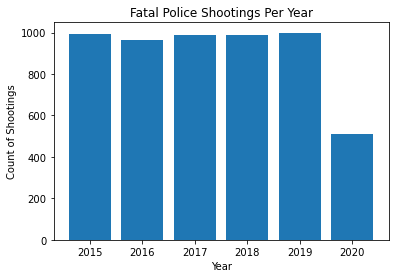

In [5]:
# Plot
plt.bar(shootings_per_year_df['year'], shootings_per_year_df['id'] )
plt.title('Fatal Police Shootings Per Year')
plt.xlabel('Year')
plt.ylabel('Count of Shootings')
plt.show()

In [6]:
monthly_shootings_df = pd.DataFrame(yearly_shootings.groupby('month')['id'].count())
monthly_shootings_df
monthly_shootings_df = monthly_shootings_df.reset_index()
monthly_shootings_df

,month,id
0,01,529
1,02,493
2,03,550
3,04,470
4,05,485
5,06,474
6,07,439
7,08,418
8,09,363
9,10,410


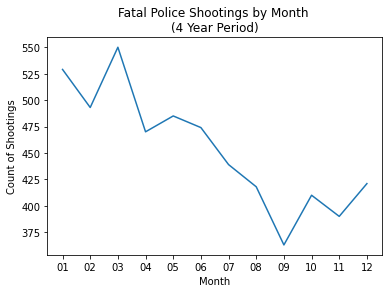

In [7]:
# Plot
plt.plot(monthly_shootings_df['month'], monthly_shootings_df['id'])
plt.title('Fatal Police Shootings by Month \n(4 Year Period)')
plt.xlabel('Month')
plt.ylabel('Count of Shootings')
plt.show()

### Shootings by State Population

#### Shootings and State Population (Four Year Period)

In [8]:
# Shootings by State over the span of 4 years
# Census data manipulation 
# to estimate the average state population by summing 4 year city population averages within each state
state_info_df = census_df[['state','Average']]
state_avg_pop_df = state_info_df.groupby('state')['Average'].sum()
state_avg_pop_df = state_avg_pop_df.reset_index()
state_avg_pop_df = state_avg_pop_df.rename(columns={'Average': 'average population'})

# Shooting Totals by State
shooting_state_info = shootings_df[['state', 'id']]
shooting_state_df = shooting_state_info.groupby('state')[['id']].count()
shooting_state_df = shooting_state_df.reset_index()
shooting_state_df = shooting_state_df.rename(columns={'id': 'shooting occurences (4 year total)'})

#Table Merge
state_pop_shooting_comparison = pd.merge(state_avg_pop_df, 
                                         shooting_state_df,
                                         how='left',
                                         on='state')

four_year_state_pop_shooting_comparison = state_pop_shooting_comparison.dropna()
four_year_state_pop_shooting_comparison['shootings per 100,000'] = (
                                four_year_state_pop_shooting_comparison['shooting occurences (4 year total)']/
                                four_year_state_pop_shooting_comparison['average population']) * 100000

four_year_state_pop_shooting_comparison

C:\Users\szerp\Anacoda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,state,average population,shooting occurences (4 year total),"shootings per 100,000"
0,Alabama,1051505.00,104.0,9.890585
1,Alaska,295695.25,39.0,13.189255
2,Arizona,4613425.25,254.0,5.505671
3,Arkansas,594159.75,83.0,13.969307
4,California,25004451.75,804.0,3.215427
5,Colorado,2994223.25,199.0,6.646131
6,Connecticut,884387.50,21.0,2.374525
7,Delaware,71292.25,13.0,18.234801
8,District of Columbia,687456.25,13.0,1.891029
9,Florida,6888799.00,353.0,5.124260


In [9]:
# Data Shape
four_year_state_df = four_year_state_pop_shooting_comparison.agg(['mean', 'median', 'var', 'std', 'sem'])

four_year_state_df = four_year_state_df.rename(columns={'mean': 'Mean',
                                                        'median': 'Median',
                                                        'var': 'Variance',
                                                        'std': 'Standard Deviation',
                                                        'sem': 'SEM'})
four_year_state_df

,average population,shooting occurences (4 year total),"shootings per 100,000"
mean,2.435330e+06,111.770833,7.782506
median,1.362357e+06,86.500000,5.894502
var,1.768585e+13,18256.861259,39.560558
std,4.205455e+06,135.117953,6.289718
sem,6.070051e+05,19.502597,0.907843


In [69]:
# Max and Min States - Per Capita shootings per 100,000
four_year_state_pop_shooting_comparison.loc[((four_year_state_pop_shooting_comparison['average population'] 
                                             == 
                                             four_year_state_pop_shooting_comparison['average population'].max())
                                             |
                                            (four_year_state_pop_shooting_comparison['average population'] 
                                             == 
                                            four_year_state_pop_shooting_comparison['average population'].min()))]

,state,average population,shooting occurences (4 year total),"shootings per 100,000"
4,California,25004451.75,804.0,3.215427
19,Maine,66778.75,22.0,32.944612


In [66]:
four_year_state_pop_shooting_comparison.loc[((four_year_state_pop_shooting_comparison['shootings per 100,000'] 
                                             == 
                                             four_year_state_pop_shooting_comparison['shootings per 100,000'].max())
                                             |
                                            (four_year_state_pop_shooting_comparison['shootings per 100,000'] 
                                             == 
                                            four_year_state_pop_shooting_comparison['shootings per 100,000'].min()))]

,state,average population,shooting occurences (4 year total),"shootings per 100,000"
19,Maine,66778.75,22.0,32.944612
40,Rhode Island,413642.75,4.0,0.967018


In [12]:
state_sample = four_year_state_pop_shooting_comparison[['state']].count()
state_sample
print(st.normaltest((state_sample*.30)))


ValueError: skewtest is not valid with less than 8 samples; 1 samples were given.

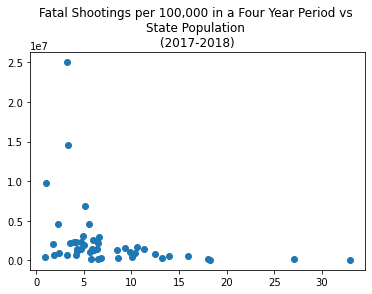

In [60]:
# Plot
plt.scatter(four_year_state_pop_shooting_comparison['shootings per 100,000'],
            four_year_state_pop_shooting_comparison['average population'])

plt.title('Fatal Shootings per 100,000 in a Four Year Period vs \nState Population \n(2017-2018)')

plt.show()

The r-squared is: 0.09013598548243928


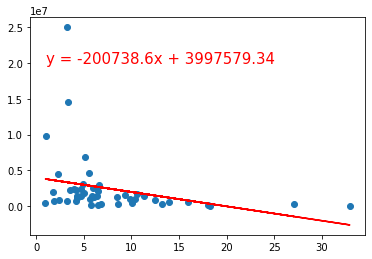

In [73]:
x = four_year_state_pop_shooting_comparison['shootings per 100,000']
y = four_year_state_pop_shooting_comparison['average population']

# Regression
x_values = x
y_values = y

# Regression Calculation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
annotation = plt.annotate(line_eq,(1,20000000),fontsize=15,color="red")
plt.xlabel( '')
plt.ylabel('')
print(f"The r-squared is: {rvalue**2}")
plt.show()

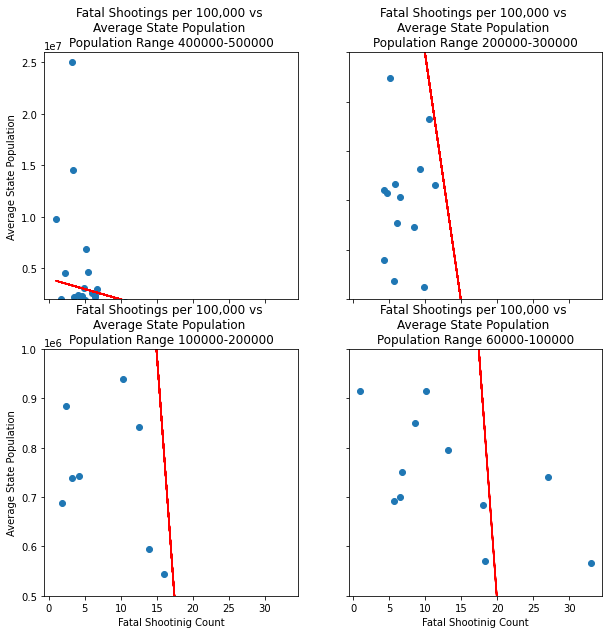

In [80]:
# Multiplot for a more detailed view of the data
#Sets plot into a 2x2 grid
fig, axs = plt.subplots(2,2, figsize=(10,10))

# Plot 1
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Fatal Shootings per 100,000 vs \nAverage State Population \nPopulation Range 400000-500000')
axs[0, 0].plot(x_values,regress_values,"r-")
axs[0, 0].set_ylim(2000000, 26000000)

# Plot 2
axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Fatal Shootings per 100,000 vs \nAverage State Population \nPopulation Range 200000-300000')
axs[0, 1].plot(x_values,regress_values,"r-")
axs[0, 1].set_ylim(1000000, 2000000)

# Plot 3 
axs[1, 0].scatter(x, y)
axs[1, 0].set_title('Fatal Shootings per 100,000 vs \nAverage State Population \nPopulation Range 100000-200000')
axs[1, 0].plot(x_values,regress_values,"r-")
axs[1, 0].set_ylim(500000, 1000000)

# Plot 4 
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_values,regress_values,"r-")
axs[1, 1].set_title('Fatal Shootings per 100,000 vs \nAverage State Population \nPopulation Range 60000-100000')
axs[1, 1].set_ylim(0,500000)

# Assign Labels
for ax in axs.flat:
    ax.set(xlabel='Fatal Shootinig Count', ylabel='Average State Population')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### Shootings and State Population (Per Year)

In [14]:
# Yearly shootings by State
# Census data manipulation 
# to identify the total population by state for each data year available
yearly_state_info_df = census_df[['state', '2015 Population', '2016 Population', '2017 Population', '2018 Population']]
yearly_state_avg_pop_df = yearly_state_info_df.groupby('state')[('2015 Population', 
                                                    '2016 Population', 
                                                    '2017 Population', 
                                                    '2018 Population')].sum()

yearly_state_avg_pop_df = yearly_state_avg_pop_df.reset_index()

# Create one column to hold multi column year data to facilitate future merge
yearly_state_avg_pop_df = yearly_state_avg_pop_df.melt(id_vars=['state'], 
                                          value_vars=['2015 Population', 
                                                      '2016 Population', 
                                                      '2017 Population', 
                                                      '2018 Population'])

yearly_state_avg_pop_df[['variable']] = yearly_state_avg_pop_df['variable'].astype('str')
yearly_state_avg_pop_df[['year', 'vals']] = yearly_state_avg_pop_df['variable'].str.split(' ', 1, expand=True)
yearly_state_avg_pop_df
yearly_state_avg_pop_df = yearly_state_avg_pop_df[['state', 'year', 'value']]
yearly_state_avg_pop_df = yearly_state_avg_pop_df.rename(columns={'value': 'average population'})
yearly_state_avg_pop_df

# Shooting Totals by State
yearly_shooting_state_info = yearly_shootings[['state', 'id', 'year']]
yearly_shooting_state_df = yearly_shooting_state_info.groupby(['state', 'year'])[['id']].count()
yearly_shooting_state_df = yearly_shooting_state_df.reset_index()
yearly_shooting_state_df = yearly_shooting_state_df.rename(columns={'id': 'shooting occurences'})
yearly_shooting_state_df

# Merge of Tables
yearly_state_pop_shooting_comparison = pd.merge(yearly_state_avg_pop_df, 
                                                 yearly_shooting_state_df,
                                                 how='left',
                                                 on=('state', 'year'))
yearly_state_pop_shooting_comparison
yearly_state_pop_shooting_comparison= yearly_state_pop_shooting_comparison.dropna()

yearly_state_pop_shooting_comparison[['year']] = yearly_state_pop_shooting_comparison['year'].astype('int')

yearly_state_pop_shooting_comparison['shootings per 100,000'] = (
                                    yearly_state_pop_shooting_comparison['shooting occurences']/
                                    yearly_state_pop_shooting_comparison['average population']) * 100000

yearly_state_pop_shooting_comparison

C:\Users\szerp\Anacoda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,state,year,average population,shooting occurences,"shootings per 100,000"
0,Alabama,2015,1049629.0,17.0,1.619620
1,Alaska,2015,298695.0,4.0,1.339159
2,Arizona,2015,4499542.0,42.0,0.933428
3,Arkansas,2015,589879.0,5.0,0.847631
4,California,2015,24822460.0,190.0,0.765436
...,...,...,...,...,...
191,Texas,2018,14847680.0,85.0,0.572480
192,Utah,2018,1090113.0,19.0,1.742939
193,Virginia,2018,2391696.0,18.0,0.752604
194,Washington,2018,2632112.0,22.0,0.835831


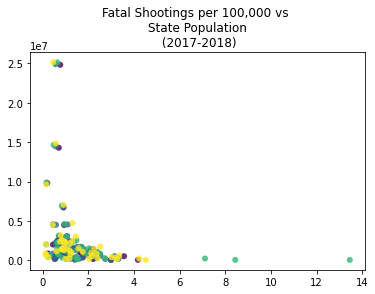

In [53]:
plt.scatter(yearly_state_pop_shooting_comparison['shootings per 100,000'], 
            yearly_state_pop_shooting_comparison['average population'], 
            c=yearly_state_pop_shooting_comparison['year'], alpha=.8, linewidths=.05)

plt.title('Fatal Shootings per 100,000 vs \nState Population\n (2017-2018)')

plt.show()

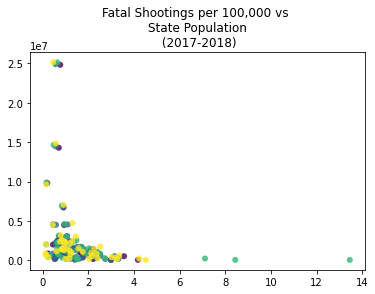

### Shootings by City Population

#### Shootings and City Population  (Four Year Period)

In [16]:
# DF View
combined_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,signs_of_mental_illness,threat_level,flee,body_camera,GEO_ID,2015 Population,2016 Population,2017 Population,2018 Population,Average
0,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,...,False,other,Not fleeing,False,1600000US2079000,389955.0,389927.0,390599.0,389259.0,389935.00
1,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,...,True,attack,Not fleeing,False,1600000US0667000,864816.0,870887.0,884363.0,883305.0,875842.75
2,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,Male,Hispanic,Chandler,Arizona,...,False,attack,Car,False,1600000US0412000,260833.0,247459.0,253448.0,257153.0,254723.25
3,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,Male,White,Stockton,California,...,False,attack,Not fleeing,False,1600000US0675000,305650.0,307057.0,310476.0,311189.0,308593.00
4,22,Hashim Hanif Ibn Abdul-Rasheed,2015-01-07,shot,knife,41.0,Male,Black,Columbus,Ohio,...,True,other,Not fleeing,False,1600000US3918000,849067.0,862643.0,881901.0,895877.0,872372.00


#### Calculating lethal shootings per 100,000 people

In [17]:
# Identify the count of lethal shootings in each unique city and state
# combination through the use of groupby
cities_state_grp = combined_df.groupby(['state', 'city'])
counts = cities_state_grp['id'].count()

# Convert to DF
counts_by_city_df = pd.DataFrame({'shooting occurences' : counts})

# Reset index
counts_by_city_df = counts_by_city_df.reset_index()

# Merge DF with average population information
per_capita_df = pd.merge(counts_by_city_df, 
                         combined_df[['city', 'state', 'Average']], 
                         on=('city', 'state'), 
                         how='left')

# Calculate per capita shootings
per_capita_df['shootings per 100,000'] = (per_capita_df['shooting occurences']/
                                     per_capita_df['Average'])*100000

# Restructuring of columns
per_capita_df = per_capita_df[['state', 'city', 'shooting occurences', 'Average', 'shootings per 100,000']]

# Column title format
per_capita_df = per_capita_df.rename(columns={'Average': 'average population'})

# Drop duplicates
per_capita_df = per_capita_df.drop_duplicates()

per_capita_df

,state,city,shooting occurences,average population,"shootings per 100,000"
0,Alabama,Birmingham,8,212595.75,3.763010
8,Alabama,Hoover,2,84958.50,2.354091
10,Alabama,Huntsville,8,195129.00,4.099852
18,Alabama,Mobile,3,191760.75,1.564449
21,Alabama,Montgomery,4,199588.25,2.004126
...,...,...,...,...,...
2436,Wisconsin,Madison,3,253696.50,1.182515
2439,Wisconsin,Milwaukee,14,595647.75,2.350382
2453,Wisconsin,Oshkosh,1,66633.00,1.500758
2454,Wisconsin,Racine,2,77574.50,2.578167


#### Data Shape - Shooting Occurences, Average Population, and Per Capita Shootings

In [18]:
# Data Shape
pop_distrb = per_capita_df.agg(['mean', 'median', 'var', 'std', 'sem'])
pop_distrb
pop_distrb_df = pop_distrb.rename(columns={'mean': 'Mean',
                                          'median': 'Median',
                                          'var': 'Variance',
                                          'std': 'Standard Deviation',
                                          'sem': 'SEM'})
pop_distrb_df

,shooting occurences,average population,"shootings per 100,000"
mean,5.404396,2.236313e+05,2.635402
median,3.000000,1.133172e+05,2.183817
var,72.558571,2.502261e+11,3.640848
std,8.518132,5.002261e+05,1.908101
sem,0.399336,2.345096e+04,0.089453


#### Plotting Relationships

##### Lethal shootings per 100,000 people vs Average Population (4 years)

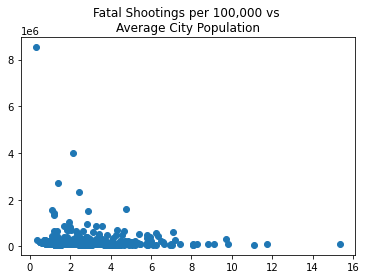

In [19]:
plt.scatter(per_capita_df['shootings per 100,000'], 
            per_capita_df['average population'])

plt.title('Fatal Shootings per 100,000 vs \nAverage City Population')

plt.show()

#### Plotting Relationships - Subdivided by City Population Sizes

##### Regression Scatter Plot

In [20]:
x = per_capita_df['shootings per 100,000']
y = per_capita_df['average population']

The r-squared is: 0.0026383280666281714


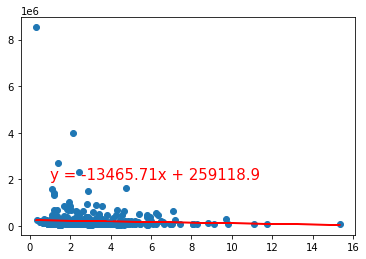

In [46]:
x_values = x
y_values = y

# Regression Calculation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
annotation = plt.annotate(line_eq,(1,2000000),fontsize=15,color="red")
plt.xlabel( '')
plt.ylabel('')
print(f"The r-squared is: {rvalue**2}")
plt.show()

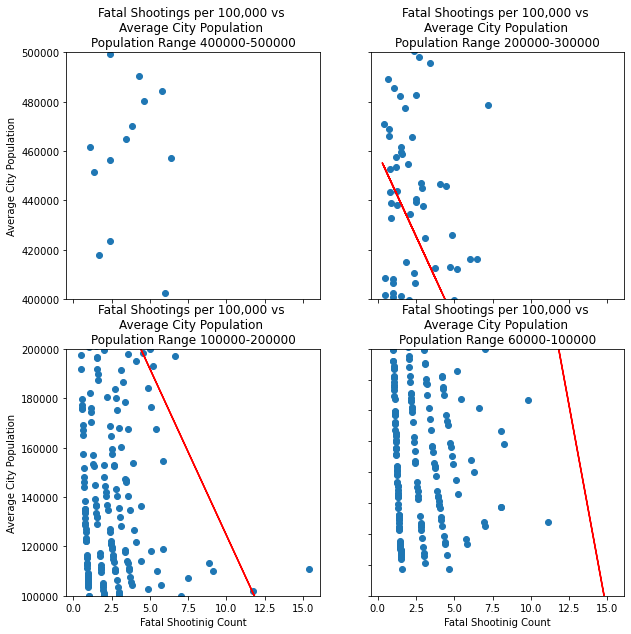

In [49]:
# Multiplot for a more detailed view of the data
#Sets plot into a 2x2 grid
fig, axs = plt.subplots(2,2, figsize=(10,10))

# Plot 1
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 400000-500000')
axs[0, 0].plot(x_values,regress_values,"r-")
axs[0, 0].set_ylim(400000, 500000)

# Plot 2
axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 200000-300000')
axs[0, 1].plot(x_values,regress_values,"r-")
axs[0, 1].set_ylim(200000, 300000)

# Plot 3 
axs[1, 0].scatter(x, y)
axs[1, 0].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 100000-200000')
axs[1, 0].plot(x_values,regress_values,"r-")
axs[1, 0].set_ylim(100000, 200000)

# Plot 4 
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_values,regress_values,"r-")
axs[1, 1].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 60000-100000')
axs[1, 1].set_ylim(60000,100000)

# Assign Labels
for ax in axs.flat:
    ax.set(xlabel='Fatal Shootinig Count', ylabel='Average City Population')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
   

    #ax.plot(**marker_style)
    

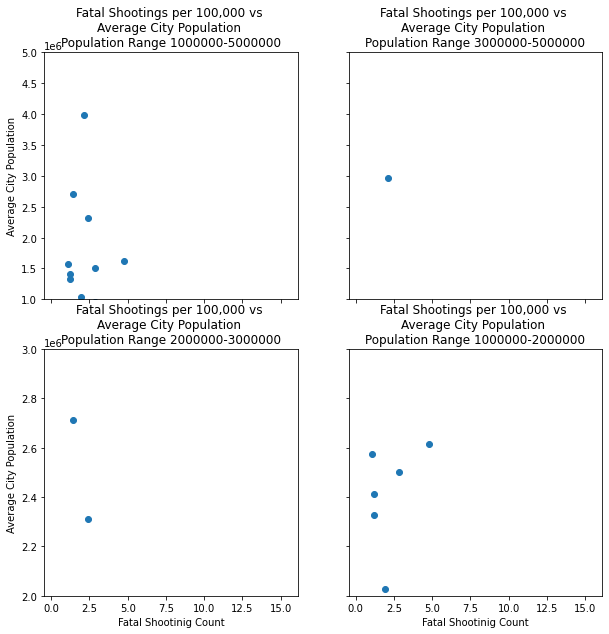

In [50]:
# Multiplot
x_values = x
y_values = y

# Regression Calculation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Sets plot into a 2x2 grid
fig, axs = plt.subplots(2,2, figsize=(10,10))

# Plot 1
axs[0, 0].scatter(x, y)
axs[0, 0].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 1000000-5000000')
axs[0, 0].plot(x_values,regress_values,"r-")
# axs[1, 1].set_ylim(12,16)
axs[0, 0].set_ylim(1000000, 5000000)

# Plot 2
axs[0, 1].scatter(x, y)
axs[0, 1].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 3000000-5000000')
axs[0, 1].plot(x_values,regress_values,"r-")
# axs[0, 1].set_ylim(8,12)
axs[0, 1].set_ylim(3000000,5000000)

# Plot 3 
axs[1, 0].scatter(x, y)
axs[1, 0].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 2000000-3000000')
axs[1, 0].plot(x_values,regress_values,"r-")
# axs[0, 1].set_ylim(4,8)
axs[1, 0].set_ylim(2000000, 3000000)

# Plot 4 
axs[1, 1].scatter(x, y)
axs[1, 1].plot(x_values,regress_values,"r-")
#axs[1, 1].annotate(line_eq,(2,20),fontsize=15,color="red")
axs[1, 1].set_title('Fatal Shootings per 100,000 vs \nAverage City Population \nPopulation Range 1000000-2000000')
#axs[1, 1].set_ylim(50000,100000)
#axs[1, 1].set_markersize=5000
# Print out the r-squared value along with the plot.
axs[1, 1].set_ylim(1000000,2000000)

for ax in axs.flat:
    ax.set(xlabel='Fatal Shootinig Count', ylabel='Average City Population')
    #ax.plot(**marker_style)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    #ax.plot(**marker_style)